# 7 Data frame correlations (Infected samples)

Made by: Cynthia Soto <br>
Date: 25 de febrero del 2021 <br>
Last md:  <br>

In [1]:
# Libraries required
import os 
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/matrices_de_expresion")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")          
#print(os.listdir(os.getcwd())       

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/matrices_de_expresion


In [68]:
# file_name = 'matrix_E_infected.csv'
# file_name = 'matrix_D_healthy.csv'
file_name = 'matrix_hybrid.csv'

## Declare functions

In [77]:
# generate a pearson corr and send the output to a heatmap
    # pearson : standard correlation coefficient
    # kendall : Kendall Tau correlation coefficient
    # spearman : Spearman rank correlation
    
def df_plot_heatmap_corr(df1, title):
    plt.figure(figsize=(10,7), dpi= 80)
    corrMatrix = df1.corr(method='pearson')          ## pearson is default meth
    sns.heatmap(corrMatrix, annot=False)             ## annot=False/True for labels
                                                     ## add a specific color to your hm:  cmap='Reds'
    #sns.heatmap(corrMatrix, annot=True, fmt='.3f')  ## set number of floats 0.000
    plt.title(title, fontsize=16)
    plt.xlabel("Samples", fontsize=14)
    plt.ylabel("Samples", fontsize=14)    
    #plt.xticks(rotation = 45)
    plt.show()

In [13]:
## Get top pair correlations
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

## Load data

In [78]:
df1 = pd.read_csv(file_name, sep='\t')
df1

,Genes,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ch22.3,Bc12.1,Bc24.1,Bc18.1,...,Bc24,Ch40,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
0,AT1G01020,3.577080,3.722695,4.271592,4.061866,4.210753,4.397349,3.504560,3.024506,3.698258,...,3.093358,3.858249,3.245116,3.021122,3.450222,3.180247,3.043127,3.255054,3.683884,3.358069
1,AT1G01030,0.813054,1.386145,1.389103,1.187182,1.198640,1.103423,1.604416,2.558963,2.030601,...,2.399901,1.699740,1.365594,1.472976,1.557977,1.297293,1.506375,1.773176,1.372161,0.951845
2,AT1G01040,4.321488,3.954649,4.673360,4.449645,4.374409,4.716444,4.349693,3.896429,4.444534,...,3.854353,4.082323,4.884407,4.712364,4.516026,4.469015,4.232778,3.881098,4.621488,4.004852
3,AT1G01050,7.048061,5.161407,5.873609,5.889641,5.826132,6.016877,7.109458,5.916040,6.613054,...,6.123775,5.393719,6.670352,6.755886,6.744494,6.845704,6.883584,5.707820,6.816023,5.914834
4,AT1G01060,5.182570,4.839341,4.486360,3.440469,3.366659,4.414180,5.280658,2.309359,9.288742,...,1.979520,5.038022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20898,AT5G64310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.568459,2.920069,3.850388,4.101202,3.988907,4.561101,3.461477,3.552037
20899,AT5G64905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.663197,1.365957,1.411799,0.000000,0.000000,0.000000,0.849386,0.000000
20900,AT5G65300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.643492,3.016747,2.296192,1.378236,1.248277,3.095151,2.356192,0.990798
20901,AT5G66985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.007810,0.000000,0.713021,0.000000,0.000000,0.000000,0.388029,0.000000


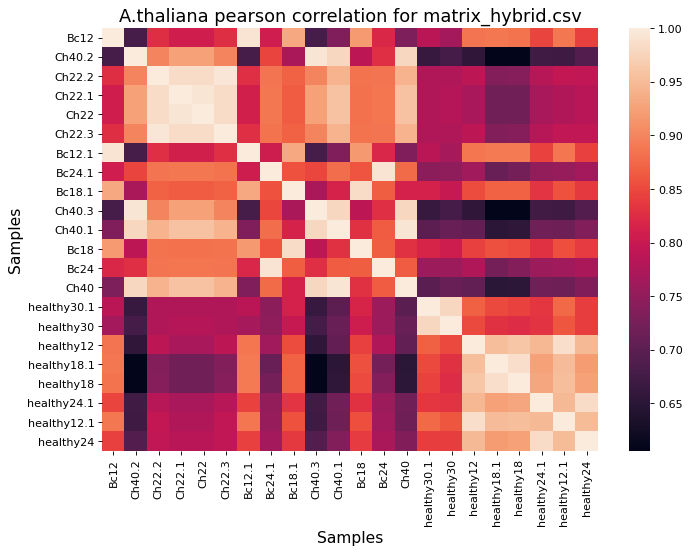

In [79]:
title = "A.thaliana pearson correlation for " + file_name
df_plot_heatmap_corr(df1, title)

In [80]:
#df1.head
df1.drop(['Genes'],axis=1,inplace=True)
df1

,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ch22.3,Bc12.1,Bc24.1,Bc18.1,Ch40.3,...,Bc24,Ch40,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
0,3.577080,3.722695,4.271592,4.061866,4.210753,4.397349,3.504560,3.024506,3.698258,3.511199,...,3.093358,3.858249,3.245116,3.021122,3.450222,3.180247,3.043127,3.255054,3.683884,3.358069
1,0.813054,1.386145,1.389103,1.187182,1.198640,1.103423,1.604416,2.558963,2.030601,1.471288,...,2.399901,1.699740,1.365594,1.472976,1.557977,1.297293,1.506375,1.773176,1.372161,0.951845
2,4.321488,3.954649,4.673360,4.449645,4.374409,4.716444,4.349693,3.896429,4.444534,3.913743,...,3.854353,4.082323,4.884407,4.712364,4.516026,4.469015,4.232778,3.881098,4.621488,4.004852
3,7.048061,5.161407,5.873609,5.889641,5.826132,6.016877,7.109458,5.916040,6.613054,5.098383,...,6.123775,5.393719,6.670352,6.755886,6.744494,6.845704,6.883584,5.707820,6.816023,5.914834
4,5.182570,4.839341,4.486360,3.440469,3.366659,4.414180,5.280658,2.309359,9.288742,4.917844,...,1.979520,5.038022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.568459,2.920069,3.850388,4.101202,3.988907,4.561101,3.461477,3.552037
20899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.663197,1.365957,1.411799,0.000000,0.000000,0.000000,0.849386,0.000000
20900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.643492,3.016747,2.296192,1.378236,1.248277,3.095151,2.356192,0.990798
20901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.007810,0.000000,0.713021,0.000000,0.000000,0.000000,0.388029,0.000000


In [81]:
print("Top Absolute Correlations")
get_top_abs_correlations(df1,30)

Top Absolute Correlations


Ch22.2       Ch22.3         0.994019
Ch22.1       Ch22           0.993790
Ch40.2       Ch40.3         0.993619
Ch40.1       Ch40           0.993376
Bc24.1       Bc24           0.991796
Bc12         Bc12.1         0.991675
healthy18.1  healthy18      0.987120
healthy12    healthy12.1    0.986281
Ch22.2       Ch22.1         0.983867
             Ch22           0.983827
Bc18.1       Bc18           0.983804
healthy24.1  healthy24      0.983790
Ch22         Ch22.3         0.983513
Ch22.1       Ch22.3         0.983475
Ch40.3       Ch40           0.979860
Ch40.2       Ch40           0.979674
Ch40.3       Ch40.1         0.979643
Ch40.2       Ch40.1         0.979402
healthy30.1  healthy30      0.979153
healthy12    healthy18      0.960058
Ch22         Ch40.1         0.958382
Ch22.1       Ch40.1         0.958181
             Ch40           0.957845
Ch22         Ch40           0.957571
healthy18    healthy12.1    0.953145
healthy12    healthy18.1    0.952999
healthy18.1  healthy12.1    0.952078
h

In [82]:
df1.corr().unstack().sort_values().drop_duplicates()

Ch40.3     healthy18.1    0.605843
Ch40.2     healthy18.1    0.606039
healthy18  Ch40.3         0.606113
Ch40.2     healthy18      0.606236
Ch40       healthy18.1    0.650266
                            ...   
Ch40.1     Ch40           0.993376
Ch40.2     Ch40.3         0.993619
Ch22       Ch22.1         0.993790
Ch22.2     Ch22.3         0.994019
Bc12       Bc12           1.000000
Length: 232, dtype: float64

## High corr

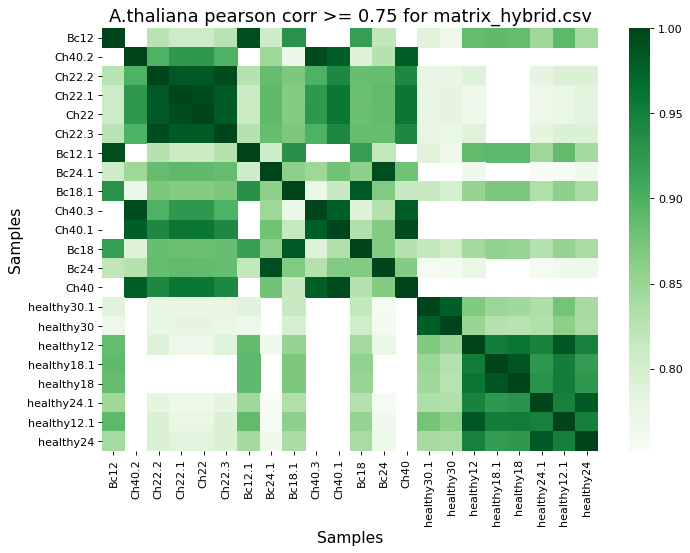

In [83]:
# High correlations
title = "A.thaliana pearson corr >= 0.75 for " + file_name
corr = df1.corr()
kot = corr[corr>=.75]
plt.figure(figsize=(10,7), dpi= 80)
sns.heatmap(kot, cmap="Greens", annot=False)
plt.title(title, fontsize=16)
plt.xlabel("Samples", fontsize=14)
plt.ylabel("Samples", fontsize=14)    
#plt.xticks(rotation = 45)
plt.show()

# Low correlations

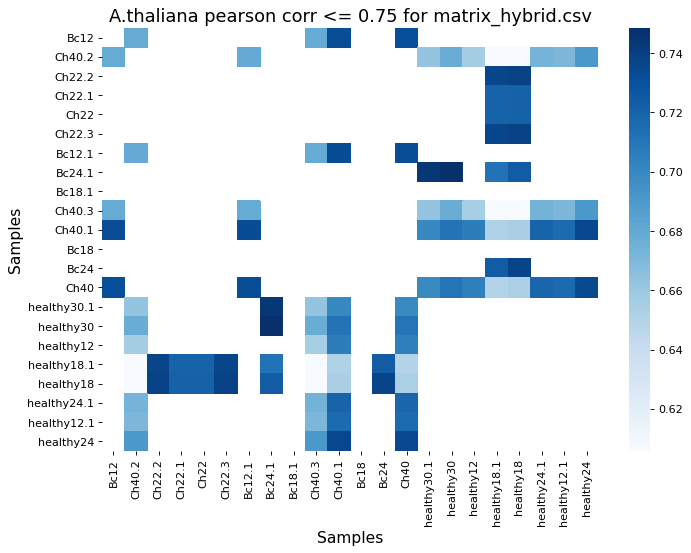

In [85]:
# Low correlations
title = "A.thaliana pearson corr <= 0.75 for " + file_name
corr = df1.corr()
kot = corr[corr <= 0.75]
plt.figure(figsize=(10,7), dpi= 80)
sns.heatmap(kot, cmap="Blues", annot=False)
plt.title(title, fontsize=16)
plt.xlabel("Samples", fontsize=14)
plt.ylabel("Samples", fontsize=14)    
#plt.xticks(rotation = 45)
plt.show()

# Range of correlations


In [41]:
title = "A.thaliana pearson (dfCorr >= .75) | (dfCorr <= -.75) for " + file_name

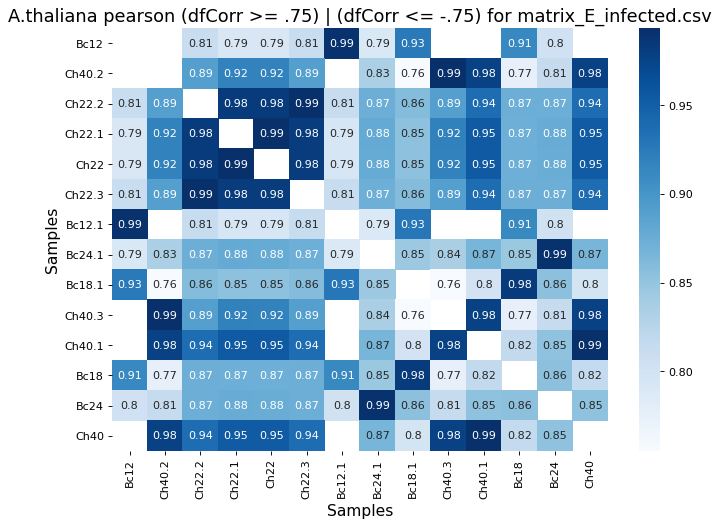

In [42]:
dfCorr = df1.corr()
filteredDf = dfCorr[((dfCorr >= .75) | (dfCorr <= -.75)) & (dfCorr !=1.000)]
plt.figure(figsize=(10,7), dpi= 80)
sns.heatmap(filteredDf, annot=True, cmap="Blues")
plt.title(title, fontsize=16)
plt.xlabel("Samples", fontsize=14)
plt.ylabel("Samples", fontsize=14)    
#plt.xticks(rotation = 45)
plt.show()